![banner, Netflix Logo](https://torranceca.files.wordpress.com/2019/10/netflix.jpg)

# Netflix EDA and Visualization 
---
## Background
> Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies without commercials on an internet-connected device. [[Reference]](https://help.netflix.com/en/node/412#:~:text=Netflix%20is%20a%20subscription%2Dbased,on%20an%20internet%2Dconnected%20device.&text=If%20you're%20already%20a,visit%20Getting%20started%20with%20Netflix.)

In this analysis, the dataset used contains the information of all the movies and TV shows on Netflix. The dataset will be used to answer the research questions:
 - What are the top movies from each genre?
 - Which country produces the most TV shows?
 - What's the best month to release content?

## About the Data
The data represents the current catalog of Movies and TV shows on Netflix as of September 25, 2021. The dataset was sourced from Kaggle: [here](https://www.kaggle.com/shivamb/netflix-shows).
The following is a brief description of each variable (there are a total of 12 columns):
- `show_id`: Unique ID for every Movie / Tv Show
- `type`: Identifier - A Movie or TV Show
- `title`: Title of the Movie / Tv Show
- `director`: Director of the Movie
- `cast`: Actors involved in the movie / show
- `country`: Country where the movie / show was produced
- `date_added`: Date it was added on Netflix
- `release_year`: Actual Release year of the move / show
- `rating`: TV Rating of the movie / show
- `duration`: Total Duration - in minutes or number of seasons
- `listed_in`: Genre
- `description`: The summary description

 

## Importing required packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import ggplot
import matplotlib.pyplot as plt
import missingno as msno

## Loading the dataset

In [3]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df.shape

(8807, 12)

The dataset contains 12 columns that we can use for exploratory analysis. Just by observing the first 5 rows, we can see that there are NaN values in multiple columns. This takes us to the next step, cleaning the dataset. 

## Cleaning the data

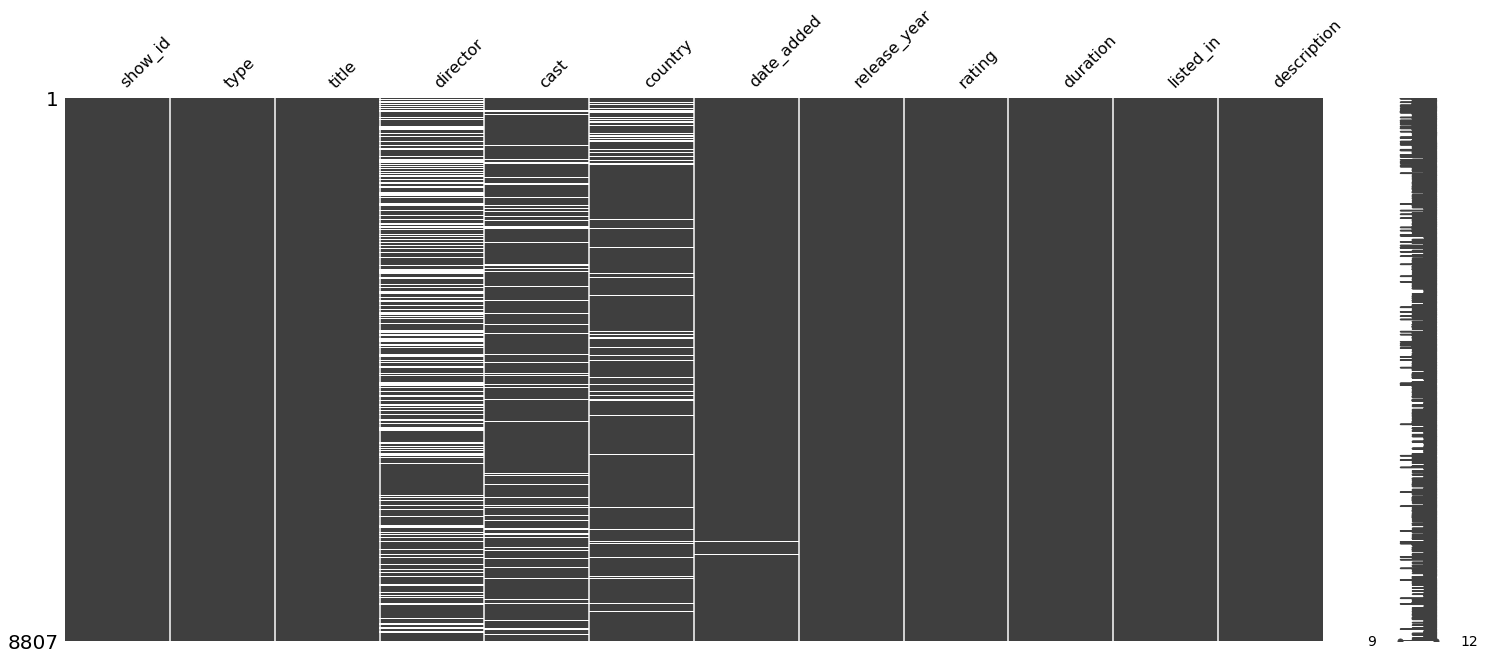

In [5]:
msno.matrix(netflix_df)
plt.show()

From the plot above, we see that the director column contains the most NaN values. With other columns such as cast and country showing null values. To get a better idea of just how much we will find the percentage of null values in each column and which columns contain null values.

In [6]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [7]:
(netflix_df.isnull().mean()*100).sort_values(ascending=False)[:6]

director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

About 30% of the director column is null, followed by country and cast.
Before we can begin any analysis of the data, we will have to first deal with these null values.

We cannot use imputation, which is a method for dealing with missing values by filling them either with their estimatied statistical "best guess" values (e.g.: mean, mode, median) or by using techniques such as KNN or tree-based. This is because it is better in the cases of director, country, and cast to have an unknown value than to have an incorrect value. So, instead, we will use use of the fillna function from Pandas to indicate that the information is missing. 

In [8]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)

Since the percentage of null values for date_added, rating, and duration are less than 1%, we will instead drop all the rows that contain NaN values for any of these columns. 

In [9]:
netflix_df.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [10]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


In [11]:
netflix_df.shape
#change

(8790, 12)

---
## EDA and Visualization